#Testes com o Detector de Emoção

## Importações de bibliotecas

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

tensorflow.__version__

'2.14.0'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Carregamento do Modelo


In [59]:
cascade_faces = '/content/gdrive/MyDrive/Colab Notebooks/Image Recognize/Material/haarcascade_frontalface_default.xml'


caminho_modelo = '/content/gdrive/MyDrive/Colab Notebooks/Image Recognize/Material/modelo_01_expressoes.h5'

face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

# Detecção de Face

In [53]:
# Imagem para teste de detecção facial
imagem = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Image Recognize/Material/testes/iuli_23.jpeg')


In [54]:
original = imagem.copy()
faces = face_detection.detectMultiScale(imagem, scaleFactor = 1.2, minNeighbors= 5,
                                          minSize =(20,20))

#Extração do interesse da imagem

In [55]:
#transfomar a imagem colorida para ciza:
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [56]:
cinza.shape

(1024, 768)

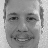

1/1 [==============================] - 0s 47ms/step
[6.8717745e-05 3.0466986e-14 3.7198588e-06 9.6689242e-01 1.1825798e-04
 5.7287098e-06 3.2911167e-02]
0.9668924
3


In [62]:
original = imagem.copy()

nova_largura = int(original.shape[1] * 0.40)
nova_altura = int(original.shape[0] * 0.40)

for (x, y, w, h) in [faces[0]]:
  # Extração do ROI (region of interest)
  roi = cinza[y:y + h, x:x + w] # utilizamos as coordenadas (onde inicia a face) e a largura e altura para extrair a região de interesse

  # Redimensiona imagem
  roi = cv2.resize(roi, (48, 48))

  cv2_imshow(roi)

  # Normalização
  roi = roi.astype("float") / 255
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis = 0)

  # Previsões
  preds = classificador_emocoes.predict(roi)[0]
  print(preds)

  # Emoção detectada
  emotion_probability = np.max(preds)
  print(emotion_probability)

  print(preds.argmax())
  label = expressoes[preds.argmax()]


  # Mostra resultado na tela para o rosto
  cv2.putText(original, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)


imagem_redimensionada = cv2.resize(original, (nova_largura, nova_altura))


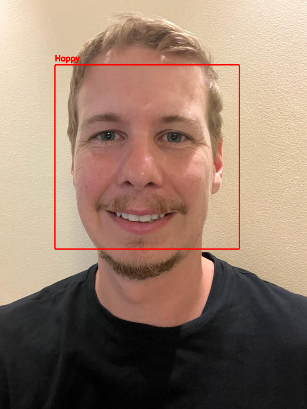

In [64]:
cv2_imshow(imagem_redimensionada)

In [50]:
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Image Recognize/iuli_happy.jpg', original)

True